In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import os
print(os.listdir("../../../../../data/fashionMNIST"))

['t10k-images-idx3-ubyte', 'train-labels-idx1-ubyte', 'train-images-idx3-ubyte', 'fashionmnist.zip', 'fashion-mnist_train.csv', 't10k-labels-idx1-ubyte', 'fashion-mnist_test.csv']


In [3]:
import fastai
print("fastai: ", fastai.__version__)

fastai:  1.0.42


In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
PATH= "../../../../../data/fashionMNIST/"

In [6]:
train = pd.read_csv( PATH+"fashion-mnist_train.csv" )
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [7]:
test = pd.read_csv( PATH+"fashion-mnist_test.csv" )
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [8]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
classes = [
'Tshirt',
'Trouser',
'Pullover',
'Dress',
'Coat',
'Sandal',
'Shirt',
'Sneaker',
'Bag',
'Ankle_boot' ]

In [11]:
#!rm -fr 'train'
#!rm -fr 'test'
!ls

fashion_MNIST.ipynb  models  test  train


In [12]:
if not os.path.exists('train'):
    os.makedirs('train')    
if not os.path.exists('test'):
    os.makedirs('test')
print(os.listdir())    

['train', 'test', 'models', 'fashion_MNIST.ipynb', '.ipynb_checkpoints']


In [13]:
def createFolders():
    for folder in classes:
        if not os.path.exists(folder):
            os.makedirs(folder)   

In [14]:
if os.path.exists('train'):
    os.chdir('train')
    createFolders()
if os.path.exists('../test'):
    os.chdir('../test')
    createFolders()    
os.chdir('../')    

In [15]:
print('train', os.listdir('train'))
print('test:',os.listdir('test'))
!pwd

train ['Trouser', 'Pullover', 'Dress', 'Sneaker', 'Coat', 'Shirt', 'Sandal', 'Bag', 'Ankle_boot', 'Tshirt']
test: ['Trouser', 'Pullover', 'Dress', 'Sneaker', 'Coat', 'Shirt', 'Sandal', 'Bag', 'Ankle_boot', 'Tshirt']
/home/norvilr/ml/github/AI/VSoAI/ImageClassification/FashionMNIST


In [16]:
## Process data
#extract labels column into y
y_train = train.loc[:,'label']
y_test = test.loc[:,'label']

#extract pixel array into X
X_train= train
X_train.drop('label',axis=1,inplace=True)
X_test= test
X_test.drop('label',axis=1,inplace=True)

In [17]:
##Convert Pandas dataframe to np array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [18]:
X_train.shape

(60000, 784)

In [19]:
X_train = X_train.reshape(-1, 28, 28)
X_test = X_test.reshape(-1, 28, 28)
X_train.shape

(60000, 28, 28)

In [20]:
# reshape into 3 channel ndarray (as expected by model)
X_train = np.stack((X_train, ) * 3, axis=-1)
X_test = np.stack((X_test, ) * 3, axis=-1)
X_train.shape

(60000, 28, 28, 3)

In [21]:
X_train[0].shape

(28, 28, 3)

In [22]:
len(y_train), len(y_test)

(60000, 10000)

In [23]:
from matplotlib import pyplot as plt
#savig train dataset
for i in range(len(y_train)):
    folder = classes[y_train[i]]
    fullPath = 'train/'+folder+'/'+str(i)+'.png'
    plt.imsave(fullPath, X_train[i])

In [24]:
#savig test dataset
for i in range(len(y_test)):
    folder = classes[y_test[i]]
    fullPath = 'test/'+folder+'/'+str(i)+'.png'
    plt.imsave(fullPath, X_test[i])

In [25]:
!ls -la 'train'

total 1568
drwxrwxr-x 12 norvilr norvilr   4096 vas.  14 17:11 .
drwxrwxr-x  6 norvilr norvilr   4096 vas.  14 18:07 ..
drwxrwxr-x  2 norvilr norvilr 163840 vas.  14 17:12 Ankle_boot
drwxrwxr-x  2 norvilr norvilr 159744 vas.  14 17:12 Bag
drwxrwxr-x  2 norvilr norvilr 147456 vas.  14 17:12 Coat
drwxrwxr-x  2 norvilr norvilr 159744 vas.  14 17:12 Dress
drwxrwxr-x  2 norvilr norvilr 167936 vas.  14 17:12 Pullover
drwxrwxr-x  2 norvilr norvilr 155648 vas.  14 17:12 Sandal
drwxrwxr-x  2 norvilr norvilr 143360 vas.  14 17:12 Shirt
drwxrwxr-x  2 norvilr norvilr 155648 vas.  14 17:12 Sneaker
drwxrwxr-x  2 norvilr norvilr 176128 vas.  14 17:12 Trouser
drwxrwxr-x  2 norvilr norvilr 151552 vas.  14 17:12 Tshirt


In [26]:
#print(os.listdir("train/Pullover"))
!ls "train/Pullover" | head -5

0.png
10000.png
10032.png
10035.png
10036.png
ls: write error: Broken pipe


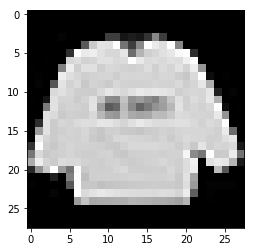

In [27]:
plt.imshow( plt.imread('train/Pullover/0.png'), interpolation='nearest')


In [28]:
from fastai.vision import *
from fastai.metrics import error_rate
from fastai import *

In [29]:
path='.'
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder(path, train='train', valid='test', ds_tfms=tfms, size=28).normalize(imagenet_stats)

In [30]:
data

ImageDataBunch;

Train: LabelList
y: CategoryList (60000 items)
[Category Trouser, Category Trouser, Category Trouser, Category Trouser, Category Trouser]...
Path: .
x: ImageItemList (60000 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: .;

Valid: LabelList
y: CategoryList (10000 items)
[Category Trouser, Category Trouser, Category Trouser, Category Trouser, Category Trouser]...
Path: .
x: ImageItemList (10000 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: .;

Test: None

In [31]:
data.classes, len(data.train_ds), len(data.valid_ds)

(['Ankle_boot',
  'Bag',
  'Coat',
  'Dress',
  'Pullover',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Trouser',
  'Tshirt'],
 60000,
 10000)

In [40]:
data.train_ds.x.sizes

{44914: torch.Size([28, 28]),
 27410: torch.Size([28, 28]),
 40279: torch.Size([28, 28]),
 38494: torch.Size([28, 28]),
 31217: torch.Size([28, 28]),
 57508: torch.Size([28, 28]),
 28237: torch.Size([28, 28]),
 14686: torch.Size([28, 28]),
 57798: torch.Size([28, 28]),
 18361: torch.Size([28, 28]),
 13847: torch.Size([28, 28]),
 2001: torch.Size([28, 28]),
 56225: torch.Size([28, 28]),
 50850: torch.Size([28, 28]),
 37493: torch.Size([28, 28]),
 12729: torch.Size([28, 28]),
 11681: torch.Size([28, 28]),
 50726: torch.Size([28, 28]),
 58875: torch.Size([28, 28]),
 50878: torch.Size([28, 28]),
 3934: torch.Size([28, 28]),
 370: torch.Size([28, 28]),
 36954: torch.Size([28, 28]),
 21028: torch.Size([28, 28]),
 19828: torch.Size([28, 28]),
 11304: torch.Size([28, 28]),
 29401: torch.Size([28, 28]),
 41246: torch.Size([28, 28]),
 53053: torch.Size([28, 28]),
 59869: torch.Size([28, 28]),
 53735: torch.Size([28, 28]),
 55352: torch.Size([28, 28]),
 16558: torch.Size([28, 28]),
 45107: torch.

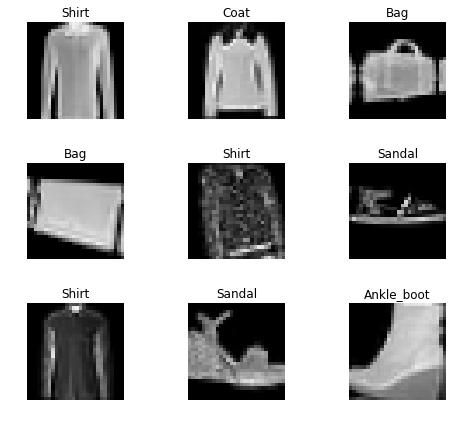

In [32]:
data.show_batch(rows=3, figsize=(7,6))

In [33]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [43]:
doc(create_cnn)

In [47]:
data

<bound method DataBunch.dl of ImageDataBunch;

Train: LabelList
y: CategoryList (60000 items)
[Category Trouser, Category Trouser, Category Trouser, Category Trouser, Category Trouser]...
Path: .
x: ImageItemList (60000 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: .;

Valid: LabelList
y: CategoryList (10000 items)
[Category Trouser, Category Trouser, Category Trouser, Category Trouser, Category Trouser]...
Path: .
x: ImageItemList (10000 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: .;

Test: None>

In [36]:
learn

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (60000 items)
[Category Trouser, Category Trouser, Category Trouser, Category Trouser, Category Trouser]...
Path: .
x: ImageItemList (60000 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: .;

Valid: LabelList
y: CategoryList (10000 items)
[Category Trouser, Category Trouser, Category Trouser, Category Trouser, Category Trouser]...
Path: .
x: ImageItemList (10000 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: .;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): 

In [38]:
data3 = ImageDataBunch.from_folder(path, train='train', valid='test', ds_tfms=tfms, size=224).normalize(imagenet_stats)
learn3 = create_cnn(data, models.resnet34, metrics=error_rate)
learn3



Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (60000 items)
[Category Trouser, Category Trouser, Category Trouser, Category Trouser, Category Trouser]...
Path: .
x: ImageItemList (60000 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: .;

Valid: LabelList
y: CategoryList (10000 items)
[Category Trouser, Category Trouser, Category Trouser, Category Trouser, Category Trouser]...
Path: .
x: ImageItemList (10000 items)
[Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
Path: .;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): 

In [39]:
data3.train_ds.x.sizes

{5106: torch.Size([28, 28]),
 48531: torch.Size([28, 28]),
 31093: torch.Size([28, 28]),
 15708: torch.Size([28, 28]),
 9528: torch.Size([28, 28]),
 40155: torch.Size([28, 28]),
 59691: torch.Size([28, 28]),
 34784: torch.Size([28, 28]),
 982: torch.Size([28, 28]),
 7067: torch.Size([28, 28]),
 6629: torch.Size([28, 28]),
 11901: torch.Size([28, 28]),
 58877: torch.Size([28, 28]),
 43518: torch.Size([28, 28]),
 54227: torch.Size([28, 28]),
 33699: torch.Size([28, 28]),
 15704: torch.Size([28, 28]),
 33447: torch.Size([28, 28]),
 39084: torch.Size([28, 28]),
 10641: torch.Size([28, 28]),
 8001: torch.Size([28, 28]),
 52453: torch.Size([28, 28]),
 22008: torch.Size([28, 28]),
 7917: torch.Size([28, 28]),
 46329: torch.Size([28, 28]),
 23371: torch.Size([28, 28]),
 28762: torch.Size([28, 28]),
 56409: torch.Size([28, 28]),
 27852: torch.Size([28, 28]),
 1300: torch.Size([28, 28]),
 29736: torch.Size([28, 28]),
 31355: torch.Size([28, 28]),
 49401: torch.Size([28, 28]),
 234: torch.Size([2

In [60]:
data3.train_dl.dl.dataset.x.sizes

{5106: torch.Size([28, 28]),
 48531: torch.Size([28, 28]),
 31093: torch.Size([28, 28]),
 15708: torch.Size([28, 28]),
 9528: torch.Size([28, 28]),
 40155: torch.Size([28, 28]),
 59691: torch.Size([28, 28]),
 34784: torch.Size([28, 28]),
 982: torch.Size([28, 28]),
 7067: torch.Size([28, 28]),
 6629: torch.Size([28, 28]),
 11901: torch.Size([28, 28]),
 58877: torch.Size([28, 28]),
 43518: torch.Size([28, 28]),
 54227: torch.Size([28, 28]),
 33699: torch.Size([28, 28]),
 15704: torch.Size([28, 28]),
 33447: torch.Size([28, 28]),
 39084: torch.Size([28, 28]),
 10641: torch.Size([28, 28]),
 8001: torch.Size([28, 28]),
 52453: torch.Size([28, 28]),
 22008: torch.Size([28, 28]),
 7917: torch.Size([28, 28]),
 46329: torch.Size([28, 28]),
 23371: torch.Size([28, 28]),
 28762: torch.Size([28, 28]),
 56409: torch.Size([28, 28]),
 27852: torch.Size([28, 28]),
 1300: torch.Size([28, 28]),
 29736: torch.Size([28, 28]),
 31355: torch.Size([28, 28]),
 49401: torch.Size([28, 28]),
 234: torch.Size([2

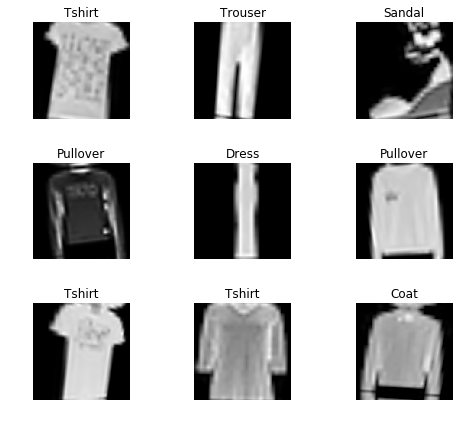

In [41]:
data3.show_batch(rows=3, figsize=(7,6))

In [34]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate
1,0.985384,0.791110,0.283000
2,0.740343,0.613741,0.236800
3,0.587717,0.481127,0.181700


KeyboardInterrupt: 

In [ ]:
learn.save('stage-1')

In [ ]:
learn.unfreeze()
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [37]:
#doc(ImageDataBunch.from_folder)
doc(lls.transform)

NameError: name 'lls' is not defined

In [38]:
learn.unfreeze()
learn.fit_one_cycle(8, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.428666,0.339114,0.127700
2,0.399137,0.317925,0.120300
3,0.353738,0.284502,0.108100
4,0.337652,0.260445,0.097600
5,0.310665,0.253185,0.095000
6,0.297497,0.239893,0.089200
7,0.292743,0.234244,0.089000
8,0.277896,0.236906,0.091000


In [39]:
learn.fit_one_cycle(4, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.282004,0.239771,0.093300
2,0.287705,0.237163,0.087900
3,0.286601,0.229186,0.087400
4,0.254553,0.230762,0.088500


In [40]:
learn.fit_one_cycle(1, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.263053,0.220928,0.084500


In [41]:
learn.freeze()
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.273144,0.244015,0.092800
2,0.279007,0.230282,0.085800
3,0.243747,0.223252,0.084800
4,0.248489,0.220645,0.084400


In [42]:
learn.fit_one_cycle(4, 1e-5)

epoch,train_loss,valid_loss,error_rate
1,0.240966,0.217713,0.083400
2,0.243442,0.217515,0.082000
3,0.249500,0.219539,0.083200
4,0.257715,0.220378,0.084800


In [43]:
learn.unfreeze()
learn.fit_one_cycle(8, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,error_rate
1,0.247545,0.215825,0.080900
2,0.259727,0.215754,0.081900
3,0.236812,0.215244,0.081900
4,0.236137,0.220709,0.084100
5,0.239392,0.213197,0.081000
6,0.228424,0.215319,0.083300
7,0.226295,0.216513,0.080700
8,0.232272,0.214117,0.081200


## Direct Approach

In [ ]:
# Normalization
mean = X_train.mean()
std = X_train.std()
X_train = (X_train-mean)/std
X_test = (X_test-mean)/std

In [ ]:
# Numpy to Torch Tensor
X_train = torch.from_numpy(np.float32(X_train))
y_train = torch.from_numpy(y_train.astype(np.long))
X_test = torch.from_numpy(np.float32(X_test))
y_test = torch.from_numpy(y_test.astype(np.long))

In [ ]:
#https://forums.fast.ai/t/databunch-from-numpy-arrays/28916
#    info on custom dataItem class creation

In [ ]:
train = torch.utils.data.TensorDataset(X_train, y_train)
valid = torch.utils.data.TensorDataset(X_test, y_test)
train

In [ ]:
tfms = get_transforms(do_flip=True)
data2 = ImageDataBunch.create(train_ds = train, valid_ds=valid)
#data2.show_batch(rows=3, figsize=(7,6))


In [ ]:
learn2 = create_cnn(data2, models.resnet34, metrics=error_rate)

In [ ]:
# data = ImageDataBunch.from_csv(PATH, folder='train',test='test',csv_labels='labels.csv', ds_tfms=tfms, size=224,suffix='.jpg', bs=16)
# data.normalize(imagenet_stats)

In [ ]:
# ImageClassifierData.from_arrays()

In [ ]:
#data.normalize(imagenet_stats)

In [ ]:
#data.show_batch(rows=2, figsize=(10,8), ds_type=DatasetType.Valid)

In [ ]:
#learn = create_cnn(data, models.resnet18, metrics=error_rate)